# Exporting American Movie Adaptations 

## Regresssion Model Stepwise Analysis <a id='top'></a> 

1. [Research Question](#1)<br/>
2. [Scraped: Movie Adaptations Data](#2) <br/>
3. [Exporatory Data Analysis: Movie Adaptations Dataframe](#3)<br/>
   [3a. Explore features correlation](#3a)<br/>
   [3b. Explore and handle categorical data](#3b)<br/>
4. [Cross-Validation](#4)<br/>
5. [Modeling](#5)<br/>
6. [Model Tuning](#6) <br/>
   [6a. Regularization](#6a)<br/>
   [6b. Features engineering](#6b)<br/>
   [6c. Modeling with new features](#6c)<br/> 
   [6d. Linear regression assumptions](#6d)<br/>
7. [Best Model ](#7)<br/>
8. [Results](#8)<br/>


In [1]:
import pandas as pd
import numpy as np
import sklearn
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pylab as py
import seaborn as sns 
sns.set_theme(color_codes=True)
import matplotlib.pyplot as plt
import scipy.stats as stats


In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.metrics import r2_score, mean_absolute_error
%matplotlib inline


## 1. Research Question<a id='1'></a> 

* RQ. Can a model predict a movie adaptation's <sup>1</sup> international total gross revenue based on movie data available on boxofficemojo.com?
* Data source: boxofficemojo.com 
* Error metric: mean_squared_error

<sup>1</sup> Adapted from books, television shows, events, video games, or plays. 


## 2. Scraped [Movie Adaptations Data](https://github.com/slp22/regression-project/blob/main/regression_movies_webscraping.ipynb)<a id='2'></a> 


## 3. Exporatory Data Analysis: [Movie Adaptations Dataframe](https://github.com/slp22/regression-project/blob/main/regression_movies_eda.ipynb)<a id='3'></a> 

In [3]:
movie_df = pd.read_csv('clean_df.csv')
movie_df.drop(columns=['link_stub'], inplace=True)
movie_df.head(1)

,international_total_gross,domestic_total_gross,rank,movie_title,max_theaters,opening_theathers,worldwide_total_gross,domestic_opening,budget,release_date,runtime,distributor,genres,rating
0,1119261396,543638043,6,The Lion King,4802.0,4725.0,1662899439,191770759,260000000,20190711,118.0,Walt Disney Studios Motion Pictures,Adventure Animation Drama Family Musical,PG


In [4]:
movie_df.describe()

,international_total_gross,domestic_total_gross,rank,max_theaters,opening_theathers,worldwide_total_gross,domestic_opening,budget,release_date,runtime
count,9.010000e+02,9.010000e+02,901.000000,892.000000,883.000000,9.010000e+02,9.010000e+02,9.010000e+02,9.010000e+02,888.000000
mean,9.183527e+07,6.763279e+07,497.576027,2387.964126,2319.178935,1.493606e+08,2.050866e+07,4.292592e+07,2.003508e+07,106.838964
std,1.469717e+08,8.387197e+07,272.863922,1186.793401,1241.689206,2.288027e+08,2.884948e+07,5.459796e+07,1.038582e+05,18.167391
min,9.800000e+01,7.420000e+02,6.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.978122e+07,63.000000
25%,9.418365e+06,1.501365e+07,266.000000,1533.250000,1427.000000,2.717350e+05,4.003993e+06,0.000000e+00,1.996052e+07,94.000000
50%,3.345942e+07,3.968769e+07,500.000000,2608.500000,2598.000000,6.005214e+07,1.107158e+07,2.200000e+07,2.005041e+07,103.000000
75%,1.049362e+08,8.241850e+07,734.000000,3259.000000,3230.500000,1.857703e+08,2.416611e+07,6.800000e+07,2.012072e+07,116.000000
max,1.119261e+09,5.436380e+08,964.000000,4802.000000,4725.000000,1.662899e+09,1.917708e+08,2.700000e+08,2.022030e+07,187.000000


In [5]:
# check for null values
movie_df.isnull().sum()

international_total_gross      0
domestic_total_gross           0
rank                           0
movie_title                    0
max_theaters                   9
opening_theathers             18
worldwide_total_gross          0
domestic_opening               0
budget                         0
release_date                   0
runtime                       13
distributor                    2
genres                         0
rating                       167
dtype: int64

In [6]:
# drop null values
movie_df.dropna(axis=0, how='any', inplace=True)

In [7]:
# double check for null values
movie_df.isnull().sum()

international_total_gross    0
domestic_total_gross         0
rank                         0
movie_title                  0
max_theaters                 0
opening_theathers            0
worldwide_total_gross        0
domestic_opening             0
budget                       0
release_date                 0
runtime                      0
distributor                  0
genres                       0
rating                       0
dtype: int64

In [8]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 0 to 900
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   international_total_gross  718 non-null    int64  
 1   domestic_total_gross       718 non-null    int64  
 2   rank                       718 non-null    int64  
 3   movie_title                718 non-null    object 
 4   max_theaters               718 non-null    float64
 5   opening_theathers          718 non-null    float64
 6   worldwide_total_gross      718 non-null    int64  
 7   domestic_opening           718 non-null    int64  
 8   budget                     718 non-null    int64  
 9   release_date               718 non-null    int64  
 10  runtime                    718 non-null    float64
 11  distributor                718 non-null    object 
 12  genres                     718 non-null    object 
 13  rating                     718 non-null    object 

[back to top](#top)

### 3a. Explore features correlation<a id='3a'></a> 

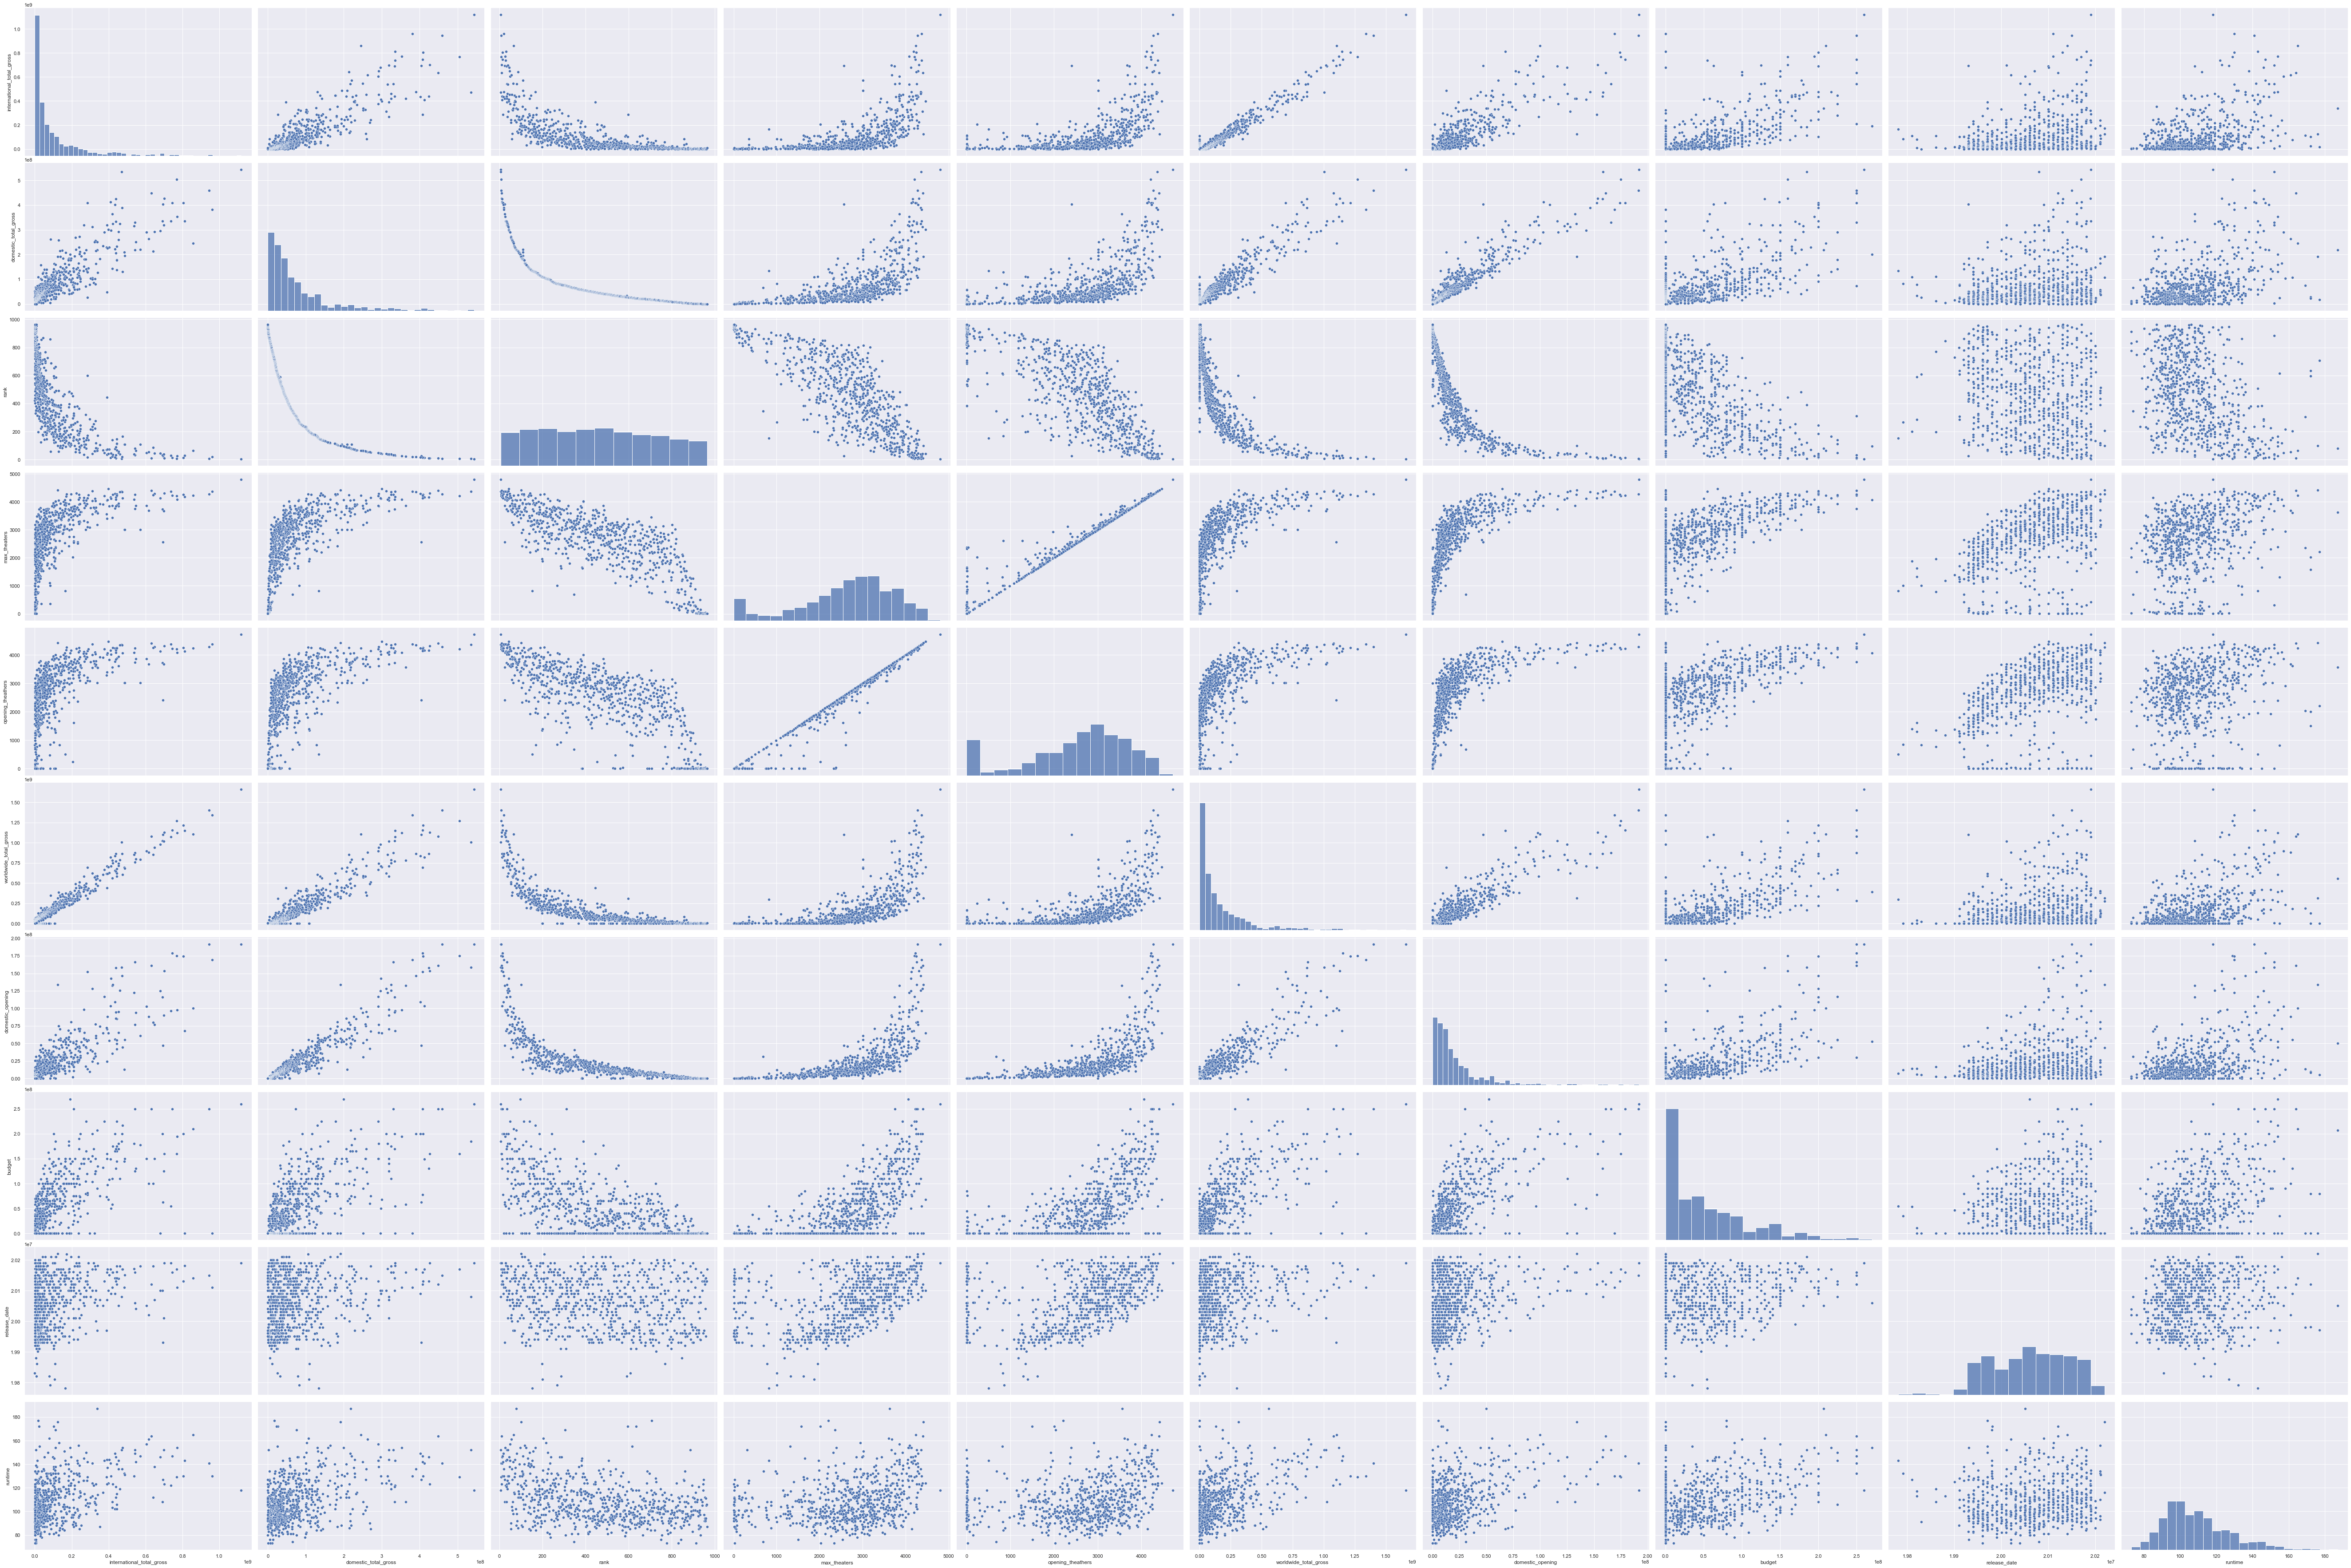

In [9]:
sns.pairplot(movie_df, height=5, aspect=1.5);

Text(0.5, 1.0, 'Heatmap of Movie Features')

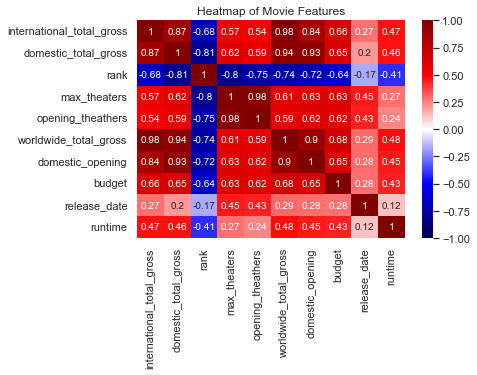

In [10]:
# heatmap correlation matrix
sns.heatmap(movie_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)  

plt.title('Heatmap of Movie Features', fontsize = 12) 

### Correlation Summary

#### Target-Features
*target = `international_total_gross`*
* target correlated with (highest to lowest):
    * `domestic_total_gross`
    * `domestic_opening`
    * `budget`
    * `max_theaters`
    * `opening_theathers`

Target is highly correlated with `worldwide_total_gross`; has known multicollinearity as:<br/>
`worldwide_total_gross` = `domestic_total_gross` + `international_total_gross`

####  Features-Features: Positive Correlation
* domestic_total_gross:
    * `domestic_opening`
    * `worldwide_total_gross`
    * `budget`
    * `max_theaters`
    * `opening_theathers`
* domestic_opening:<br/>
    * `budget`
    * `max_theaters`
    * `opening_theathers`
* max_theaters:
    * `opening_theathers`
    * `budget`
    * `domestic_opening`

####  Features-Features: Negative Correlation
* rank:
    * `domestic_total_gross`
    * `max_theaters`
    * `opening_theathers`
    * `domestic_opening`
    * `budget`
    


[back to top](#top)

### 3b. Explore and handle categorical data<a id='3b'></a> 

In [11]:
# explore genres as candidate for dummies
print('Unique genres:', movie_df.genres.nunique())
print('\n')
print('Genres counts\n', movie_df['genres'].value_counts())
# 👎 too many; look for other dummy variables. 

Unique genres: 281


Genres counts
 Action Adventure SciFi                                    38
Comedy Drama Romance                                      20
Action Adventure SciFi Thriller                           20
Drama Romance                                             16
Comedy                                                    16
                                                          ..
Adventure Comedy Drama Fantasy Romance                     1
Action Adventure Drama                                     1
Action Drama Horror                                        1
Action Adventure Animation Comedy Family Fantasy SciFi     1
Comedy Horror Mystery Thriller                             1
Name: genres, Length: 281, dtype: int64


In [12]:
# explore MPAA rating as candidate for dummies
print('Unique MPAA ratings:', movie_df.rating.nunique())
print('\n')
rating_count = movie_df['rating'].value_counts()
print('Rating counts\n', rating_count)
# 👍 easy-to-use for dummy variables

Unique MPAA ratings: 4


Rating counts
 PG13    304
R       217
PG      189
G         8
Name: rating, dtype: int64


In [13]:
# get dummies for MPAA rating 
df_dummies_rating = pd.get_dummies(movie_df, columns=['rating'], drop_first=True)
df_dummies_rating.head(2)
movie_df = df_dummies_rating
movie_df.head(1)

,international_total_gross,domestic_total_gross,rank,movie_title,max_theaters,opening_theathers,worldwide_total_gross,domestic_opening,budget,release_date,runtime,distributor,genres,rating_PG,rating_PG13,rating_R
0,1119261396,543638043,6,The Lion King,4802.0,4725.0,1662899439,191770759,260000000,20190711,118.0,Walt Disney Studios Motion Pictures,Adventure Animation Drama Family Musical,1,0,0


In [14]:
# explore distributor as candidate for dummies 
print('Unique distributors:', movie_df.distributor.nunique())
print('\n')
distributor_count = movie_df['distributor'].value_counts()
print('Distributor count\n', distributor_count)
# 👍 Reasonable amount, group lower frequencies into an other category.

Unique distributors: 66


Distributor count
 Warner Bros.                           123
Twentieth Century Fox                   89
Paramount Pictures                      88
Walt Disney Studios Motion Pictures     73
Universal Pictures                      68
                                      ... 
Fox Atomic                               1
United Artists Releasing                 1
Pantelion Films                          1
TriStar Pictures                         1
Cinedigm Entertainment Group             1
Name: distributor, Length: 66, dtype: int64


In [15]:
# create distributor other category
distributor_other = list(distributor_count[distributor_count < 20].index)
movie_df['distributor'] = movie_df['distributor'].replace(distributor_other, 'other')

# get dummies for distributor
df_dummies_distributor = pd.get_dummies(movie_df, columns=['distributor'], drop_first=True)
movie_df = df_dummies_distributor
movie_df.head(1)

,international_total_gross,domestic_total_gross,rank,movie_title,max_theaters,opening_theathers,worldwide_total_gross,domestic_opening,budget,release_date,...,rating_PG,rating_PG13,rating_R,distributor_Paramount Pictures,distributor_Sony Pictures Entertainment (SPE),distributor_Twentieth Century Fox,distributor_Universal Pictures,distributor_Walt Disney Studios Motion Pictures,distributor_Warner Bros.,distributor_other
0,1119261396,543638043,6,The Lion King,4802.0,4725.0,1662899439,191770759,260000000,20190711,...,1,0,0,0,0,0,0,1,0,0


In [16]:
movie_df.columns

Index(['international_total_gross', 'domestic_total_gross', 'rank',
       'movie_title', 'max_theaters', 'opening_theathers',
       'worldwide_total_gross', 'domestic_opening', 'budget', 'release_date',
       'runtime', 'genres', 'rating_PG', 'rating_PG13', 'rating_R',
       'distributor_Paramount Pictures',
       'distributor_Sony Pictures Entertainment (SPE)',
       'distributor_Twentieth Century Fox', 'distributor_Universal Pictures',
       'distributor_Walt Disney Studios Motion Pictures',
       'distributor_Warner Bros.', 'distributor_other'],
      dtype='object')

[back to top](#top)

## 4. Cross-Validation<a id='4'></a> 

In [17]:
# separate target from select features
y = movie_df['international_total_gross']
X = movie_df.loc[:,['domestic_total_gross', 
                    'domestic_opening', 
                    'budget',
                    'max_theaters', 
                    'opening_theathers',
                    'rank',
                    'runtime',
                    'release_date',
                    'rating_PG', 
                    'rating_PG13',
                    'rating_R',
                    'distributor_Paramount Pictures',
                    'distributor_Sony Pictures Entertainment (SPE)',
                    'distributor_Twentieth Century Fox', 
                    'distributor_Universal Pictures',
                    'distributor_Walt Disney Studios Motion Pictures',
                    'distributor_Warner Bros.', 
                    'distributor_other']]

In [18]:
# split test data set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [19]:
# set up k-folds 
kfold = KFold(n_splits=5, 
              shuffle=True, 
              random_state = 42)

[back to top](#top)

## 5. Modeling<a id='5'></a> 

### simple linear regression model 

In [20]:
# lin_reg 
lin_reg = LinearRegression()

scores = cross_val_score(lin_reg, X_train, y_train, cv=kfold)
print('k-fold indivdual scores:', scores)
print('linear regression k-fold mean score:', round(np.mean(scores), 3))

lin_reg.fit(X_train, y_train)

k-fold indivdual scores: [0.7486569  0.757162   0.86214297 0.72927468 0.74714238]
linear regression k-fold mean score: 0.769


LinearRegression()

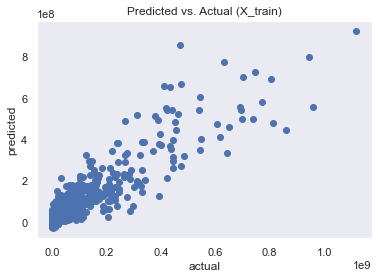

In [21]:
# lin_reg train: fitted vs. actual
y_train_predict = lin_reg.predict(X_train)

plt.scatter(y_train, y_train_predict)
plt.plot([0, 400], [0, 400])
plt.title('Predicted vs. Actual (X_train)')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.grid();

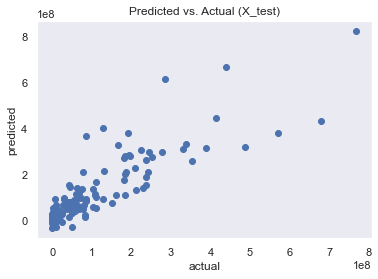

In [22]:
# lin_reg test: fitted vs. actual
y_test_predict = lin_reg.predict(X_test)

plt.scatter(y_test, y_test_predict)
plt.plot([0, 400], [0, 400])
plt.title('Predicted vs. Actual (X_test)')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.grid();

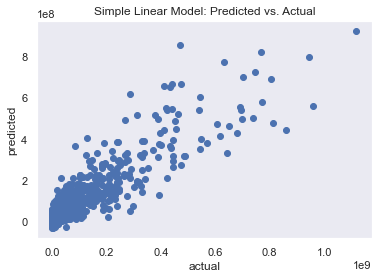

In [23]:
# lin_reg: fitted vs. actual (all data)
y_predict = lin_reg.predict(X)

plt.scatter(y, y_predict)
plt.plot([0, 400], [0, 400])
plt.title('Simple Linear Model: Predicted vs. Actual')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.grid();

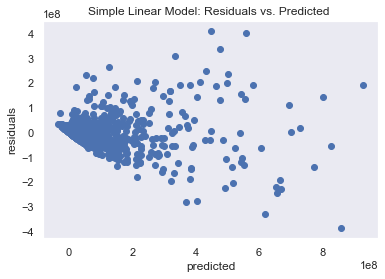

In [24]:
# lin_reg: residuals vs. predicted
y_predict = lin_reg.predict(X)
residuals = y - y_predict

plt.scatter(y_predict, residuals)
plt.plot([0,400], [0, 0])
plt.title("Simple Linear Model: Residuals vs. Predicted ")
plt.xlabel('predicted')
plt.ylabel('residuals')
plt.grid();

/Users/sandraparedes/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


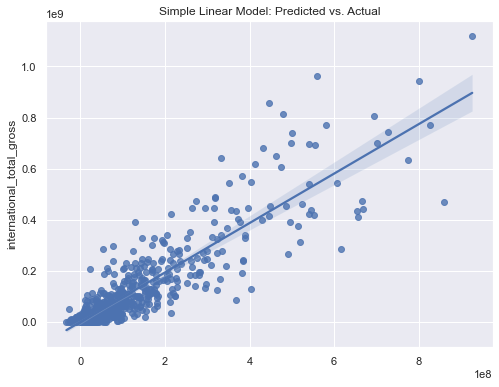

In [25]:
# linear regression plot
y_predict = lin_reg.predict(X)

f, ax = plt.subplots(figsize=(8, 6))
sns.regplot(y_predict, y).set(title='Simple Linear Model: Predicted vs. Actual');

[back to top](#top)

## 6. Model Tuning<a id='6'></a> 

In [26]:
# standard-scaling features before regularization 
std = StandardScaler()
std.fit(X_train.values)

# apply scaler to train data
X_train_std = std.transform(X_train.values)

# apply scaler to test data
X_test_std = std.transform(X_test.values)

### 6a. Regularization<a id='6a'></a> 

#### Lasso Model


In [27]:
# create lasso model
lasso_model = Lasso(alpha = 100000, fit_intercept=True, random_state=42)
lasso_model.fit(X_train_std, y_train)

# cross-validate
scores = cross_val_score(lasso_model, X_train, y_train, cv=kfold)
print('lasso model k-fold indivdual scores:', scores)
print('lasso model k-fold mean score:', round(np.mean(scores), 3))

# evaluate 
lasso_r2_train = lasso_model.score(X_train_std, y_train)
lasso_r2_test = lasso_model.score(X_test_std, y_test)
print('lasso r^2 train std:', round(lasso_r2_train, 3))
print('lasso r^2 test std:', round(lasso_r2_test, 3))
print('train < test, likely outliers')

lasso model k-fold indivdual scores: [0.7497463  0.75541925 0.86299191 0.73203147 0.7468748 ]
lasso model k-fold mean score: 0.769
lasso r^2 train std: 0.805
lasso r^2 test std: 0.696
train < test, likely outliers


#### Ridge Model


In [28]:
# create ridge model 
ridge_model = Ridge(alpha = 1000, fit_intercept=True, random_state=42)
ridge_model.fit(X_train_std, y_train)
 
# cross-validate
scores = cross_val_score(ridge_model, X_train, y_train, cv=kfold)
print('ridge model k-fold indivdual scores:', scores)
print('ridge model k-fold mean score:', round(np.mean(scores), 3))

# evaluate
ridge_r2_train = ridge_model.score(X_train_std, y_train)
ridge_r2_test = ridge_model.score(X_test_std, y_test)
print('ridge r^2 train std:', round(ridge_r2_train, 3))
print('ridge r^2 test std:', round(ridge_r2_test, 3))
print('train = test, and high, good fit')

ridge model k-fold indivdual scores: [0.75663269 0.75872756 0.86916212 0.74002608 0.75341903]
ridge model k-fold mean score: 0.776
ridge r^2 train std: 0.68
ridge r^2 test std: 0.668
train = test, and high, good fit


#### Elastic Net Model


In [29]:
# create elasticnet model 
elastic_model = ElasticNet(alpha = 1000, l1_ratio=.5)
elastic_model.fit(X_train_std, y_train)

# cross-validate
scores = cross_val_score(elastic_model, X_train, y_train, cv=kfold)
print('elastic model k-fold indivdual scores:', scores)
print('elastic model k-fold mean score:', round(np.mean(scores), 3))

elastic_r2_train = elastic_model.score(X_train_std, y_train)
elastic_r2_test = elastic_model.score(X_test_std, y_test)

print('elastic r^2 train std:', round(elastic_r2_train, 3))
print('elastic r^2 test std:', round(elastic_r2_test, 3))
print('train = test, but low, underfit')

elastic model k-fold indivdual scores: [0.75638955 0.76076358 0.86742601 0.7422134  0.75195879]
elastic model k-fold mean score: 0.776
elastic r^2 train std: 0.014
elastic r^2 test std: 0.008
train = test, but low, underfit


*Ridge model is best fit using r<sup>2</sup> score*

### Error metric: MAE

In [30]:
# evaluate models using mean absolute error 
y_pred = lin_reg.predict(X_test)
print(f'Linear Regression MAE on test: {mean_absolute_error(y_test, y_pred):.2f}')

y_pred = lasso_model.predict(X_test)
print(f'Lasso Regression MAE on test: {mean_absolute_error(y_test, y_pred):.2f}')

y_pred = ridge_model.predict(X_test)
print(f'Ridge Regression MAE on test: {mean_absolute_error(y_test, y_pred):.2f}')

y_pred = elastic_model.predict(X_test)
print(f'ElasticNet Regression MAE on test: {mean_absolute_error(y_test, y_pred):.2f}')


Linear Regression MAE on test: 45421099.61
Lasso Regression MAE on test: 12073126991246798.00
Ridge Regression MAE on test: 3929420110465276.50
ElasticNet Regression MAE on test: 43075260596713.89


/Users/sandraparedes/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
/Users/sandraparedes/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/Users/sandraparedes/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


*Simple linear regression is best model using MAE, but the error metric in off by $45.5 million.* 

[back to top](#top)

### 6b. Features engineering<a id='6b'></a> 

In [31]:
# log transformation for monetary columns 

# check for zeros in columns before log transformation 
count = (movie_df['international_total_gross'] == 0).sum()
print('count zeros in international_total_gross:', count)

count = (movie_df['domestic_total_gross'] == 0).sum()
print('count of zeros in domestic_total_gross:', count)

count = (movie_df['budget'] == 0).sum()
print('count of zeros in budget:', count)
# budget: min $0, max $270,000,000
# 👎 zeros throwing division-zero error; will not transform 

count = (movie_df['domestic_opening'] == 0).sum()
print('count of zeros in domestic_opening:', count)
# domestic_opening: min $0, max $191,770,800
# 👎 zeros throwing division-zero error; will not transform 


# 👍 domestic_total_gross
# domestic_total_gross: min $742, max $543,638,043
movie_df['log_domestic_total_gross'] = np.log(movie_df['domestic_total_gross'])


count zeros in international_total_gross: 0
count of zeros in domestic_total_gross: 0
count of zeros in budget: 214
count of zeros in domestic_opening: 1


In [32]:
# profit = domestic_total_gross - budget
movie_df['profit'] = (movie_df['domestic_total_gross'] - movie_df['budget'])

In [33]:
# opening_profit = domestic_opening - budget
movie_df['opening_profit'] = (movie_df['domestic_opening'] - movie_df['budget'])

In [34]:
# opening = domestic_opening * opening_theathers
movie_df['opening'] = (movie_df['domestic_opening'] * movie_df['opening_theathers'])

In [35]:
movie_df.columns

Index(['international_total_gross', 'domestic_total_gross', 'rank',
       'movie_title', 'max_theaters', 'opening_theathers',
       'worldwide_total_gross', 'domestic_opening', 'budget', 'release_date',
       'runtime', 'genres', 'rating_PG', 'rating_PG13', 'rating_R',
       'distributor_Paramount Pictures',
       'distributor_Sony Pictures Entertainment (SPE)',
       'distributor_Twentieth Century Fox', 'distributor_Universal Pictures',
       'distributor_Walt Disney Studios Motion Pictures',
       'distributor_Warner Bros.', 'distributor_other',
       'log_domestic_total_gross', 'profit', 'opening_profit', 'opening'],
      dtype='object')

[back to top](#top)

### 6c. Modeling with new features<a id='6c'></a> 

In [36]:
# separate target from new and original features
y2 = movie_df['international_total_gross']
X2 = movie_df.loc[:,['domestic_total_gross', 
                       'rank', 
                       'max_theaters', 
                       'opening_theathers',
                       'domestic_opening', 
                       'budget', 
                       'release_date',
                       'runtime', 
                       'rating_PG', 
                       'rating_PG13', 
                       'rating_R',
                       'distributor_Paramount Pictures',
                       'distributor_Sony Pictures Entertainment (SPE)',
                       'distributor_Twentieth Century Fox', 
                       'distributor_Universal Pictures',
                       'distributor_Walt Disney Studios Motion Pictures',
                       'distributor_Warner Bros.', 
                       'distributor_other',
                       'log_domestic_total_gross', 
                       'profit',
                       'opening', 
                       'opening_profit']]


In [37]:
# split test data set
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, 
                                                        y2,
                                                        test_size=0.2, 
                                                        random_state=42)


In [38]:
# lin_reg2: simple linear regression 
lin_reg2 = LinearRegression()

scores = cross_val_score(lin_reg2, X2_train, y2_train, cv=kfold)
print('k-fold indivdual scores:', scores)
print('linear regression2 k-fold mean score:', round(np.mean(scores), 3))

lin_reg2.fit(X2_train, y2_train)

# improvement by 0.2 


k-fold indivdual scores: [0.75083639 0.76492941 0.86908528 0.71861819 0.74991625]
linear regression2 k-fold mean score: 0.771


LinearRegression()

In [39]:
# standard-scaling features before regularization 
std = StandardScaler()
std.fit(X2_train.values)

# apply scaler to train data
X2_train_std = std.transform(X2_train.values)

# apply scaler to test data
X2_test_std = std.transform(X2_test.values)

In [40]:
# create ridge model 2
ridge_model2 = Ridge(alpha = 1000, fit_intercept=True, random_state=42)
ridge_model2.fit(X2_train_std, y2_train)

# cross-validate
scores = cross_val_score(ridge_model2, X2_train, y2_train, cv=kfold)
print('ridge model2 k-fold indivdual scores:', scores)
print('ridge model2 k-fold mean score:', round(np.mean(scores), 3))

# evaluate
ridge2_r2_train = ridge_model2.score(X2_train_std, y2_train)
ridge2_r2_test = ridge_model2.score(X2_test_std, y2_test)
print('ridge2 r^2 train std:', round(ridge2_r2_train, 3))
print('ridge2 r^2 test std:', round(ridge2_r2_test, 3))
print('train > test, overfit')

ridge model2 k-fold indivdual scores: [0.75906925 0.7684883  0.87751022 0.72257791 0.75610198]
ridge model2 k-fold mean score: 0.777
ridge2 r^2 train std: 0.729
ridge2 r^2 test std: 0.703
train > test, overfit


/Users/sandraparedes/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.2805e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/sandraparedes/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.13639e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/sandraparedes/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.22804e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/sandraparedes/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.29752e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [41]:
y2_pred = lin_reg2.predict(X2_test)
print(f'Linear Regression2 MAE on test: {mean_absolute_error(y2_test, y2_pred):.2f}')

y2_pred = ridge_model2.predict(X2_test)
print(f'Ridge Regression2 MAE on test: {mean_absolute_error(y2_test, y2_pred):.2f}')

Linear Regression2 MAE on test: 44551278.66
Ridge Regression2 MAE on test: 1733925732366612480.00


/Users/sandraparedes/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


*Simple linear regression is best model using MAE, but the error metric in off by `$`45.5 million.* 

[back to top](#top)

In [42]:
# separate target, drop some features
y3 = movie_df['international_total_gross']
X3 = movie_df.loc[:,['domestic_total_gross', 
#                        'rank', 
#                        'max_theaters', 
#                        'opening_theathers',
                       'domestic_opening', 
                       'budget', 
#                        'release_date',
#                        'runtime', 
#                        'rating_PG', 
#                        'rating_PG13', 
#                        'rating_R',
#                        'distributor_Paramount Pictures',
#                        'distributor_Sony Pictures Entertainment (SPE)',
#                        'distributor_Twentieth Century Fox', 
#                        'distributor_Universal Pictures',
#                        'distributor_Walt Disney Studios Motion Pictures',
#                        'distributor_Warner Bros.', 
#                        'distributor_other', 
#                        'log_domestic_total_gross', 
                       'profit',
                       'opening', 
                       'opening_profit']]

In [43]:
# split test data set
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, 
                                                        y3,
                                                        test_size=0.2, 
                                                        random_state=42)


In [44]:
# simple linear regression minus features 
lin_reg3 = LinearRegression()

scores = cross_val_score(lin_reg3, X3_train, y3_train, cv=kfold)
print('k-fold indivdual scores:', scores)
print('linear regression2 k-fold mean score:', np.mean(scores))

lin_reg3.fit(X3_train, y3_train)

k-fold indivdual scores: [0.75422577 0.76969508 0.87822885 0.72482568 0.75221882]
linear regression2 k-fold mean score: 0.7758388379753075


LinearRegression()

In [45]:
# standard-scaling features before regularization 
std = StandardScaler()
std.fit(X3_train.values)

# apply scaler to train data
X3_train_std = std.transform(X3_train.values)

# apply scaler to test data
X3_test_std = std.transform(X3_test.values)

In [46]:
# create ridge model3
ridge_model3 = Ridge(alpha = 100)
ridge_model3.fit(X3_train_std, y3_train)

# cross-validate
scores = cross_val_score(ridge_model3, X3_train_std, y3_train, cv=kfold)
print('ridge model2 k-fold indivdual scores:', scores)
print('ridge model2 k-fold mean score:', round(np.mean(scores), 3))

# evaluate
ridge3_r2_train = ridge_model3.score(X3_train_std, y3_train)
ridge3_r2_test = ridge_model3.score(X3_test_std, y3_test)
print('ridge2 r^2 train std:', round(ridge3_r2_train, 3))
print('ridge2 r^2 test std:', round(ridge3_r2_test, 3))
print('train = test, good fit')

ridge model2 k-fold indivdual scores: [0.76710223 0.76970191 0.84965298 0.70823461 0.74119278]
ridge model2 k-fold mean score: 0.767
ridge2 r^2 train std: 0.792
ridge2 r^2 test std: 0.701
train = test, good fit


In [47]:
y3_pred = lin_reg3.predict(X3_test)
print(f'Linear Regression3 MAE on test: {mean_absolute_error(y3_test, y3_pred):.2f}')

y3_pred = ridge_model3.predict(X3_test)
print(f'Ridge Model Regression2 MAE on test: {mean_absolute_error(y3_test, y3_pred):.2f}')

Linear Regression3 MAE on test: 42684088.39
Ridge Model Regression2 MAE on test: 2704092260310942208.00


/Users/sandraparedes/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


*Tuned linear regression is still off by `$`42.7 million. A small improvement from `$` 45.5 million but not a model any investor would trust.* 

[back to top](#top)

### 6d. Linear regression assumptions<a id='6d'></a> 

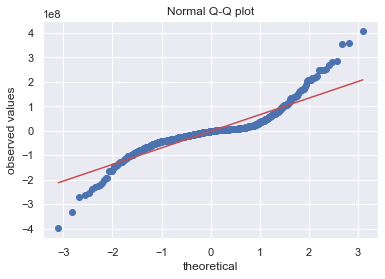

In [48]:
# normal q-q plot = heavy-tailed 
y3_predict = lin_reg3.predict(X3)
residuals = y3 - y3_predict
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.xlabel("theoretical")
plt.ylabel("observed values");
 

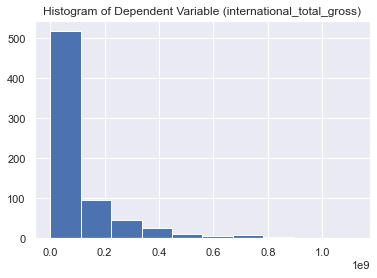

In [49]:
# residual distribution
movie_df.international_total_gross.hist(bins=10)
plt.title('Histogram of Dependent Variable (international_total_gross)');

[back to top](#top)

## 7. Best Model<a id='7'></a> 

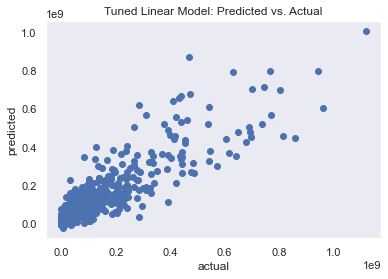

In [50]:
# lin_reg3: fitted vs. actual (all data)
y3_predict = lin_reg3.predict(X3)

plt.scatter(y3, y3_predict)
plt.plot([0, 400], [0, 400])
plt.title('Tuned Linear Model: Predicted vs. Actual')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.grid();

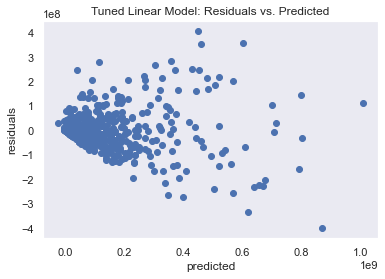

In [51]:
# residuals vs. predicted
y3_predict = lin_reg3.predict(X3)
residuals = y3 - y3_predict
plt.scatter(y3_predict, residuals)
plt.plot([0, 400], [0, 400])
plt.title("Tuned Linear Model: Residuals vs. Predicted")
plt.xlabel("predicted")
plt.ylabel("residuals")
plt.grid();
    

# Use X3_test here 

/Users/sandraparedes/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


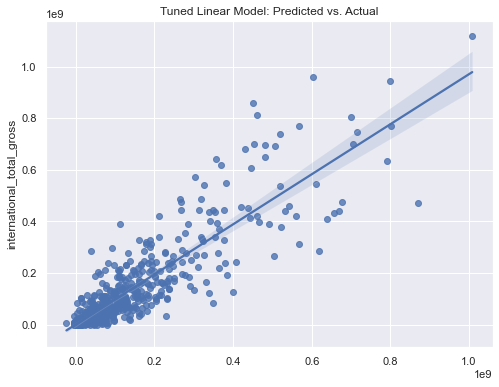

In [52]:
# linear regression plot
y3_predict = lin_reg3.predict(X3)

f, ax = plt.subplots(figsize=(8, 6))
sns.regplot(y3_predict, y3).set(title='Tuned Linear Model: Predicted vs. Actual');

[back to top](#top)

## 8. Results<a id='8'></a> 

In [53]:
lin_reg2 = sm.OLS(y2, X2)
fit2 = lin_reg2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     international_total_gross   R-squared:                       0.792
Model:                                   OLS   Adj. R-squared:                  0.787
Method:                        Least Squares   F-statistic:                     140.1
Date:                       Wed, 23 Mar 2022   Prob (F-statistic):          3.29e-223
Time:                               17:04:14   Log-Likelihood:                -14014.
No. Observations:                        718   AIC:                         2.807e+04
Df Residuals:                            698   BIC:                         2.816e+04
Df Model:                                 19                                         
Covariance Type:                   nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
domestic_total_gross                                0.4358      0.159      2.742      0.006       0.124       0.748
rank                                             3.317e+04   3.49e+04      0.951      0.342   -3.53e+04    1.02e+05
max_theaters                                     5575.7299   1.45e+04      0.385      0.700   -2.29e+04     3.4e+04
opening_theathers                                -471.6080   1.17e+04     -0.040      0.968   -2.34e+04    2.25e+04
domestic_opening                                   -1.9077      0.708     -2.695      0.007      -3.297      -0.518
budget                                              0.1937      0.357      0.542      0.588      -0.508       0.895
release_date                                       -4.9679      3.792     -1.310      0.191     -12.413       2.477
runtime                                          5.263e+05   1.88e+05      2.802      0.005    1.58e+05    8.95e+05
rating_PG                                        1.279e+07   2.68e+07      0.478      0.633   -3.98e+07    6.54e+07
rating_PG13                                      1.486e+07    2.7e+07      0.549      0.583   -3.83e+07     6.8e+07
rating_R                                         1.571e+07   2.73e+07      0.576      0.565   -3.79e+07    6.93e+07
distributor_Paramount Pictures                   1.865e+07   1.67e+07      1.114      0.266   -1.42e+07    5.15e+07
distributor_Sony Pictures Entertainment (SPE)    3.295e+07   1.74e+07      1.894      0.059    -1.2e+06    6.71e+07
distributor_Twentieth Century Fox                3.625e+07   1.67e+07      2.177      0.030    3.56e+06    6.89e+07
distributor_Universal Pictures                   1.917e+07   1.72e+07      1.117      0.264   -1.45e+07    5.29e+07
distributor_Walt Disney Studios Motion Pictures  3.327e+07   1.73e+07      1.919      0.055   -7.67e+05    6.73e+07
distributor_Warner Bros.                         2.339e+07    1.6e+07      1.460      0.145   -8.06e+06    5.48e+07
distributor_other                                 2.42e+07   1.56e+07      1.555      0.120   -6.36e+06    5.48e+07
log_domestic_total_gross                        -1.864e+06   3.48e+06     -0.535      0.593    -8.7e+06    4.97e+06
profit                                              0.8556      0.158      5.400      0.000       0.544       1.167
opening                                             0.0008      0.000      3.307      0.001       0.000       0.001
opening_profit                                     -1.0231      0.448     -2.286      0.023      -1.902      -0.144
==============================================================================
Omnibus:                   

In [54]:
# lin_reg3 has lower adjusted R^2 compared to lin_reg2
# despite removing features based on p-values
lin_reg3 = sm.OLS(y3, X3)
fit3 = lin_reg3.fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     international_total_gross   R-squared (uncentered):                   0.520
Model:                                   OLS   Adj. R-squared (uncentered):              0.518
Method:                        Least Squares   F-statistic:                              193.7
Date:                       Wed, 23 Mar 2022   Prob (F-statistic):                   2.25e-112
Time:                               17:04:15   Log-Likelihood:                         -14023.
No. Observations:                        718   AIC:                                  2.805e+04
Df Residuals:                            714   BIC:                                  2.807e+04
Df Model:                                  4                                                  
Covariance Type:                   nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
domestic_total_gross     0.3744      0.067      5.627      0.000       0.244       0.505
domestic_opening        -2.2173      0.435     -5.091      0.000      -3.072      -1.362
budget                  -0.4872      0.160     -3.042      0.002      -0.802      -0.173
profit                   0.8617      0.112      7.704      0.000       0.642       1.081
opening                  0.0011      0.000      7.401      0.000       0.001       0.001
opening_profit          -1.7300      0.278     -6.223      0.000      -2.276      -1.184
==============================================================================
Omnibus:                      188.185   Durbin-Watson:                   2.146
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1508.755
Skew:                           0.941   Prob(JB):                         0.00
Kurtosis:                       9.848   Cond. No.                     3.18e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.71e-14. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Slides, article, and code available at: https://github.com/slp22/regression-project

[back to top](#top)